## Задача 3. Шолохов Алексей, 474гр.

In [1]:
import numpy as np
from numpy import sin, cos, pi
from scipy.linalg import lu
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Решим интегральное уравнение Фредгольма второго рода с помощью квадратурной формулы средней точки. Тогда эта задача сводится к решению системы линейных уравнений вида:

$\sum_{m=1}^n[\delta_{nm} - \lambda K_{nm}]u_m = f_n, \quad n \in [1, N]$

где: $K_{nm} = h^2|n-m|$ - симметричная матрица ядра размером $N \times N$

$h = \frac{2\pi}{N}$, $\delta_{nm}$ - единичная матрица, а $f_n = f(x_n)$, $x_n = -\pi + (n-\frac{1}{2})h$

$\lambda = 0.01$, $N = 100$

Решим эту систему с помощью $LU$-разложения

In [14]:
N = 100
lamb = 0.01
h = 2*pi/N

def matrix(n,m):
    return -lamb*h**2*np.abs(n-m) + (1 if n==m else 0)

def f(x):
    return (1+2*lamb)*np.cos(x/2)**2 - lamb*(x**2+pi**2)/2

Xn = [-pi + (n-1/2)*h for n in range(1,N+1)]

M = [[matrix(n, m) for m in range(1, N+1)] for n in range(1, N+1)]

F = [f(x) for x in Xn]

def solveLU(M, F):
    P, L, U = lu(M)

    V = []
    for k in range(N):
        t = 0
        for j in range(k):
            t += L[k, j]*V[j]
        V.append(F[k] - t)

    X = []
    for k in reversed(range(N)):
        t = 0
        for j in range(k+1, N):
            t += U[k, j]*X[N-j-1]
        X.append((V[k] - t)/U[k, k])
    return X

X = solveLU(M, F)

Сравним $X$ с истинным решением $cos^2\frac{x}{2}$. Видно, что ошибка решения минимальна до неразличимости.

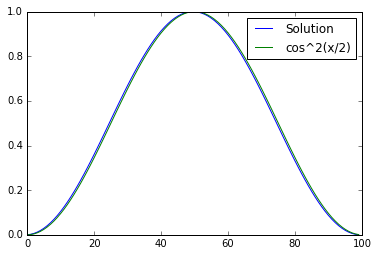

In [15]:
pylab.plot(range(len(X)), X, label="Solution")
pylab.plot(range(len(X)), [cos(-pi/2 + pi*x/100)**2 for x in range(len(X))], label="cos^2(x/2)")
pylab.legend()

Возмутим правую часть системы случайным вектором $\delta f_n$ и получим возмущение решения системы $\delta u_m$. Оценим с помощью этих данных число обусловленности матрицы системы

In [17]:
from scipy.linalg import norm
def mu(coef):
    delta = coef*np.random.randn(N)
    X_noised = solveLU(M, F*delta)
    return (norm(array(X_noised) - array(X))/norm(X))/(norm(delta)/norm(F))

mues = [mu(0.1) for _ in range(1000)]
print("Mean mu > %.2f"%mean(mues))

Mean mu > 5.87
